In [4]:
import cv2
import os

def register_user():
    # Ask for user details
    user_name = input("Enter your name: ")
    
    # Create a folder for the user
    user_folder = f"persondetection/{user_name}"
    os.makedirs(user_folder, exist_ok=True)
    
    # Open the camera to capture fingerprint
    cap = cv2.VideoCapture(0)
    print("Press 's' to save the persondetection image or 'q' to quit")
    
    count = 1
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image.")
            break
        
        # Show the live feed
        cv2.imshow("persondetection Capture", frame)
        
        # Wait for user input
        key = cv2.waitKey(1) & 0xFF
        if key == ord('s'):  # Save the image
            file_path = f"{user_folder}/persondetection_{count}.jpg"
            cv2.imwrite(file_path, frame)
            print(f"persondetection image saved as {file_path}")
            count += 1
        elif key == ord('q'):  # Quit
            print("Exiting persondetection registration.")
            break

    cap.release()
    cv2.destroyAllWindows()
    
# Register a user
register_user()


Press 's' to save the persondetection image or 'q' to quit
Exiting persondetection registration.


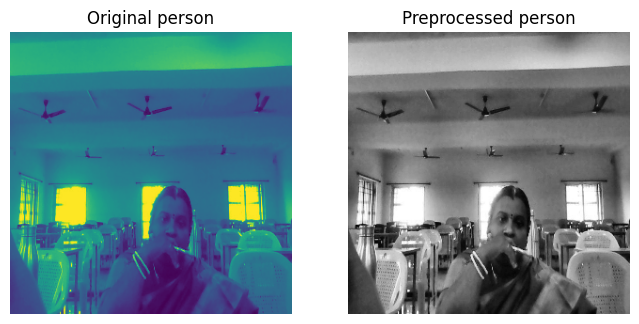

In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def preprocess_fingerprint(image_path):
    # Preprocess image (grayscale + resize + CLAHE)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (300, 300))
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return image, enhanced_image  # Return both original and preprocessed images

def extract_features(image):
    # Example features: sharpness and contrast
    sharpness = cv2.Laplacian(image, cv2.CV_64F).var()
    contrast = np.std(image)
    return [sharpness, contrast]

def load_dataset(dataset_path):
    features = []
    labels = []
    for user_folder in os.listdir(dataset_path):
        user_path = os.path.join(dataset_path, user_folder)
        if os.path.isdir(user_path):
            for file in os.listdir(user_path):
                image_path = os.path.join(user_path, file)
                
                # Load and preprocess image
                original_image, processed_image = preprocess_fingerprint(image_path)
                
                # Display the original image
                plt.figure(figsize=(8, 4))  # Create a wider figure to compare side-by-side
                plt.subplot(1, 2, 1)
                plt.imshow(original_image)
                plt.title("Original person")
                plt.axis('off')

                # Display the preprocessed image
                plt.subplot(1, 2, 2)
                plt.imshow(processed_image, cmap='gray')
                plt.title("Preprocessed person")
                plt.axis('off')

                # Show both images
                plt.show()
                
                # Extract features
                feature = extract_features(processed_image)
                features.append(feature)
                labels.append(user_folder)
                break  # Break after one image to avoid flooding
            break  # Break after processing one user folder for demo
    return np.array(features), np.array(labels)

# Load dataset
dataset_path = "persondetection"
X, y = load_dataset(dataset_path)
